**Explore whether a person with certain characteristis is expected to be away form work at some point in time or not**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### **Loading dataset**

In [114]:
df = pd.read_csv(r"https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/PredictiveModeling/Exercises/Absenteeism_data.csv")
df

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


#### **Data preprocessing**

##### Categorical variables

'Reason for Absence' is a categorical variable!

In [116]:
# 'Reason for Absence' is a categorical variable --> dummy variables
reason_columns = pd.get_dummies(df['Reason for Absence'])
reason_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [117]:
# sum must be 1
reason_columns['check'] = reason_columns.sum(axis=1)
# reason_columns['check'].all()
# len(reason_columns['check']) == len(reason_columns[reason_columns['check']==1])
list(reason_columns['check'].unique())

[1]

In [118]:
# drop one column to avoid multicollinearity
reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first=True)
reason_columns.head()

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Reasons can be divided in groups:

1-14: disease

15-17: related to pregnancy

18-21: related to poisoning

22-28: light reason (es. dental consultation)

In [119]:
# group reasons
column_disease = reason_columns.loc[:,1:14].max(axis=1)
column_pregnancy = reason_columns.loc[:,15:17].max(axis=1)
column_poisoning = reason_columns.loc[:,18:21].max(axis=1)
column_light_reason = reason_columns.loc[:,22:28].max(axis=1)

In [120]:
# add a column for each group
df["Disease"] = column_disease
df["Pregnancy"] = column_pregnancy
df["Poisoning"] = column_poisoning
df["Light reason"] = column_light_reason

In [121]:
# drop the original column
df = df.drop(columns=['Reason for Absence'])
df

,ID,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Disease,Pregnancy,Poisoning,Light reason
0,11,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,36,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,3,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,11,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,23/05/2018,179,22,40,237.656,22,2,2,0,8,1,0,0,0
696,28,23/05/2018,225,26,28,237.656,24,1,1,2,3,1,0,0,0
697,18,24/05/2018,330,16,28,237.656,25,2,0,0,8,1,0,0,0
698,25,24/05/2018,235,16,32,237.656,25,3,0,0,2,0,0,0,1


'Education' is a categorical variable.

1 --> high school

2 --> graduate

3 --> postgraduate

4 --> a master or a PhD

In [122]:
# can we reduce the number of dummy variable?
df['Education'].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

In [123]:
# yes, we can keep 
# high scool --> 0
# higher education --> 1
df['Education'] = df['Education'].map({1:0, 2:1, 3:1, 4:1})
# we must have only 0 and 1 
df['Education'].unique()

array([0, 1])

##### Dates

In [124]:
df['Date']

0      07/07/2015
1      14/07/2015
2      15/07/2015
3      16/07/2015
4      23/07/2015
          ...    
695    23/05/2018
696    23/05/2018
697    24/05/2018
698    24/05/2018
699    31/05/2018
Name: Date, Length: 700, dtype: object

In [125]:
type(df['Date'])

pandas.core.series.Series

In [126]:
type(df['Date'][0])

str

In [127]:
df['Date'].dtypes

dtype('O')

In [128]:
# convert to date specifying the format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [129]:
df['Date']

0     2015-07-07
1     2015-07-14
2     2015-07-15
3     2015-07-16
4     2015-07-23
         ...    
695   2018-05-23
696   2018-05-23
697   2018-05-24
698   2018-05-24
699   2018-05-31
Name: Date, Length: 700, dtype: datetime64[ns]

In [130]:
df['Month'] = df['Date'].dt.month
df['Month']

0      7
1      7
2      7
3      7
4      7
      ..
695    5
696    5
697    5
698    5
699    5
Name: Month, Length: 700, dtype: int64

In [131]:
def week_of_day(date):
    return date.weekday()

df['Date'].apply(lambda x: week_of_day(x))

0      1
1      1
2      2
3      3
4      3
      ..
695    2
696    2
697    3
698    3
699    3
Name: Date, Length: 700, dtype: int64

In [132]:
df['WeekDay'] = df['Date'].dt.weekday
#df['WeekDayName'] = df['Date'].dt.day_name()

Text(0, 0.5, 'absenteeism time in hours')

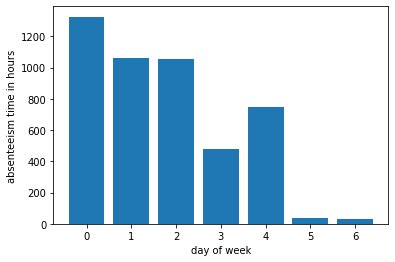

In [133]:
df_hours_by_weekday = df[['WeekDay', 'Absenteeism Time in Hours']].groupby(by=['WeekDay']).sum()
df_hours_by_weekday = df_hours_by_weekday.sort_index()
plt.bar(df_hours_by_weekday.index, df_hours_by_weekday['Absenteeism Time in Hours'])
plt.xlabel('day of week')
plt.ylabel('absenteeism time in hours')

#### **Logistic regression**

##### Data preparation --> inputs and targets

In [137]:
# create binary target --> new column 'Excessive absenteeism' 
# 0 if 'Absenteeism Time in Hours' less than the median, 1 otherwise
df['Excessive absenteeism'] = 0
df.loc[df['Absenteeism Time in Hours'] > df['Absenteeism Time in Hours'].median(), 'Excessive absenteeism'] = 1

In [138]:
# is the target column balanced?
df['Excessive absenteeism'].value_counts()

0    381
1    319
Name: Excessive absenteeism, dtype: int64

In [139]:
targets = df['Excessive absenteeism']

In [140]:
# define input columns

input_columns = [ 
    'Transportation Expense',
    'Distance to Work',
    'Age',
    'Daily Work Load Average',
    'Body Mass Index',
    'Education',
    'Children',
    'Pets',
    'Disease',
    'Pregnancy',
    'Poisoning',
    'Light reason',
    'Month',
    'WeekDay'
]

## back propagation
# columns_to_remove = ['Daily Work Load Average', 'Distance to Work', 'WeekDay']
# input_columns = [x for x in input_columns if x not in columns_to_remove]

df_input = df[input_columns]
df_input

,Transportation Expense,Age,Body Mass Index,Education,Children,Pets,Disease,Pregnancy,Poisoning,Light reason,Month
0,289,33,30,0,2,1,0,0,0,1,7
1,118,50,31,0,1,0,0,0,0,0,7
2,179,38,31,0,0,0,0,0,0,1,7
3,279,39,24,0,2,0,1,0,0,0,7
4,289,33,30,0,2,1,0,0,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...
695,179,40,22,1,2,0,1,0,0,0,5
696,225,28,24,0,1,2,1,0,0,0,5
697,330,28,25,1,0,0,1,0,0,0,5
698,235,32,25,1,0,0,0,0,0,1,5


###### Feature scaling

In [141]:
df_input.columns

Index(['Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Disease', 'Pregnancy', 'Poisoning', 'Light reason',
       'Month'],
      dtype='object')

In [142]:
# we must scale numerical columns only, not the dummy variables

columns_to_omit = ['Education', 'Disease', 'Pregnancy', 'Poisoning', 'Light reason']

# columns_to_scale = ['Transportation Expense', 'Distance to Work', 'Age', 
#         'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets', 'Month', 'WeekDay']

columns_to_scale = [x for x in df_input.columns.values if x not in columns_to_omit]

In [143]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df_input[columns_to_scale])

X_scaled = scaler.transform(df_input[columns_to_scale]) # dataframe accepted as input but returns np.array
df_input = pd.concat([pd.DataFrame(columns=columns_to_scale, data=X_scaled), df_input[list(set(df_input.columns)-set(columns_to_scale))]], axis=1)


In [144]:
df_input

,Transportation Expense,Age,Body Mass Index,Children,Pets,Month,Disease,Pregnancy,Education,Poisoning,Light reason
0,1.005844,-0.536062,0.767431,0.880469,0.268487,0.182726,0,0,0,0,1
1,-1.574681,2.130803,1.002633,-0.019280,-0.589690,0.182726,0,0,0,0,0
2,-0.654143,0.248310,1.002633,-0.919030,-0.589690,0.182726,0,0,0,0,1
3,0.854936,0.405184,-0.643782,0.880469,-0.589690,0.182726,1,0,0,0,0
4,1.005844,-0.536062,0.767431,0.880469,0.268487,0.182726,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
695,-0.654143,0.562059,-1.114186,0.880469,-0.589690,-0.388293,1,0,1,0,0
696,0.040034,-1.320435,-0.643782,-0.019280,1.126663,-0.388293,1,0,0,0,0
697,1.624567,-1.320435,-0.408580,-0.919030,-0.589690,-0.388293,1,0,1,0,0
698,0.190942,-0.692937,-0.408580,-0.919030,-0.589690,-0.388293,0,0,1,0,1


###### Split dataset into train set and test set

In [145]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_input, targets, train_size=0.8, shuffle=True, random_state=20) # set random_state to shuffle the same way every time

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(560, 11) (560,)
(140, 11) (140,)


##### Training the model

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression()
clf.fit(X_train, y_train)


LogisticRegression()

##### Evaluating the model (on train set)

In [147]:
print(f'Accuracy: {clf.score(X_train, y_train):.3f}')

Accuracy: 0.773


In [148]:
# calculate the accuracy manually
y_pred = clf.predict(X_train)

print(f'Accuracy: {sum(y_pred==y_train)/len(y_pred):.3f}')

Accuracy: 0.773


In [149]:
# compare obtained accuracy to the baseline accuracy
baseline_outputs = np.zeros(len(y_pred))
print(f'Baseline accuracy: {sum(baseline_outputs==y_train)/len(y_pred):.3f}')

Baseline accuracy: 0.548


In [150]:
# calculate confusion matrix
metrics.confusion_matrix(y_train, y_pred)

array([[251,  56],
       [ 71, 182]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


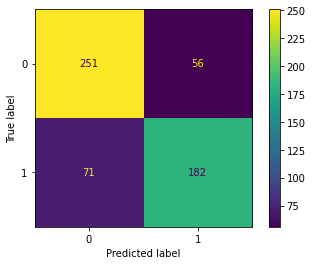

In [151]:
# plot confusion matrix
metrics.plot_confusion_matrix(clf, X_train, y_train)

##### Interpret coefficients

In [152]:
clf.intercept_

array([-1.6474549])

In [153]:
clf.coef_

array([[ 0.60528415, -0.16989096,  0.27981088,  0.34826214, -0.27739602,
         0.1589299 ,  2.80019733,  0.95188356, -0.21053312,  3.11555338,
         0.83900082]])

$ln \frac{p}{1-p}=m_{1}x_{1}+m_{2}x_{2}+...+m_{N}x_{N}+q$

$\frac{p}{1-p}=e^{m_{1}x_{1}}e^{m_{2}x_{2}}...e^{m_{N}x_{N}}e^{q}$

A feature is not particularly important:

- if its coefficient is around 0 (no matter the feature value, it will be 

multiplied by zero)

- if its odds ratio is around 1 (no change in the odds ratio)

In [154]:
df_summary = pd.DataFrame(columns=["Feature name"], data=df_input.columns)
df_summary['Coefficient'] = np.transpose(clf.coef_) # you have to transpose to make it a column
# inserisco l'intercetta al primo posto
df_summary.index = df_summary.index + 1
df_summary.loc[0] = ['Intercept', clf.intercept_[0]]
# calcolo odds ratio (termine per cui moltiplico odds ratio ad ogni incremento unitario della feature)
df_summary['Odds ratio'] = np.exp(df_summary['Coefficient'])
df_summary.sort_values(by=['Odds ratio'], ascending=False)

,Feature name,Coefficient,Odds ratio
10,Poisoning,3.115553,22.545903
7,Disease,2.800197,16.447892
8,Pregnancy,0.951884,2.590585
11,Light reason,0.839001,2.314054
1,Transportation Expense,0.605284,1.831773
4,Children,0.348262,1.416604
3,Body Mass Index,0.279811,1.322880
6,Month,0.158930,1.172256
2,Age,-0.169891,0.843757
9,Education,-0.210533,0.810152


##### **Back propagation**
Simplify the model removing all features which have close to no contribution to the model 

In [155]:
# Let's remove the input columns 'Daily Work Load Average' 'Distance to Work' 'WeekDay' and train the model again. 

##### Testing the model

In [156]:
clf.score(X_test, y_test)

0.75

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


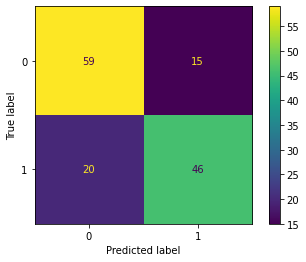

In [166]:
# plot confusion matrix
metrics.plot_confusion_matrix(clf, X_test, y_test)

In [ ]:
# Logistic regression calculate probabilities in background and returns 0 if p < 0.5, 1 if p > 0.5 

predicted_prob = clf.predict_proba(X_test) # prob of 
predicted_prob[:,1] # prob of Excessive absenteeism

In [170]:
(clf.predict(X_test) == np.where(predicted_prob[:,1] < 0.5, 0, 1)).all()

True

##### Saving the model

In [174]:
import pickle

with open('model', 'wb') as f:
    pickle.dump(clf, f)